#Transfer Learning

It is a deep learning technique where we use a pretrained model. This pre trained model is trained for one task and can be re-trained for a similar task with a smaller dataset

Transfer Learning gives higher accuracy compared to training models from scratch.

Eg: VGG-16, ResNet50, Yolo

Data collection

In [1]:
!pip install kaggle

In [2]:
# Move it to the correct folder
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#Dogs vs Cat API
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 97% 791M/814M [00:07<00:00, 47.1MB/s]
100% 814M/814M [00:07<00:00, 117MB/s] 


In [4]:
#EXtracting the compressed dataset
from zipfile import ZipFile

dataset='/content/dogs-vs-cats-redux-kernels-edition.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('extraction done')

extraction done


In [5]:
#EXtracting the compressed dataset
from zipfile import ZipFile

dataset='/content/train.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('extraction done')

extraction done


In [6]:
#EXtracting the compressed dataset
from zipfile import ZipFile

dataset='/content/test.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('extraction done')

extraction done


In [7]:
import os
#counting number of file in train FOlder
path, dirs, files = next(os.walk('/content/train'))
file_count=len(files)
print('NUmber of images:', file_count)

NUmber of images: 25000


Printing the names of images

In [8]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.158.jpg', 'cat.464.jpg', 'cat.5703.jpg', 'cat.10700.jpg', 'cat.11006.jpg', 'cat.3485.jpg', 'cat.12235.jpg', 'cat.10014.jpg', 'dog.278.jpg', 'cat.5248.jpg', 'dog.1897.jpg', 'cat.3874.jpg', 'cat.562.jpg', 'dog.6389.jpg', 'cat.1358.jpg', 'cat.7419.jpg', 'cat.5519.jpg', 'cat.5758.jpg', 'cat.1610.jpg', 'cat.11311.jpg', 'dog.7386.jpg', 'dog.4961.jpg', 'dog.1476.jpg', 'cat.2065.jpg', 'cat.11929.jpg', 'dog.12293.jpg', 'dog.3982.jpg', 'dog.4107.jpg', 'cat.7106.jpg', 'cat.10956.jpg', 'cat.6543.jpg', 'cat.3315.jpg', 'cat.237.jpg', 'dog.9816.jpg', 'dog.8098.jpg', 'dog.8178.jpg', 'dog.5747.jpg', 'dog.3426.jpg', 'cat.8253.jpg', 'cat.2838.jpg', 'cat.8325.jpg', 'cat.7987.jpg', 'dog.429.jpg', 'cat.11363.jpg', 'dog.2449.jpg', 'dog.10696.jpg', 'dog.5111.jpg', 'dog.5564.jpg', 'dog.6250.jpg', 'cat.11888.jpg', 'dog.8225.jpg', 'dog.7065.jpg', 'cat.5010.jpg', 'dog.10538.jpg', 'cat.6769.jpg', 'dog.8114.jpg', 'cat.8175.jpg', 'cat.11181.jpg', 'dog.1170.jpg', 'cat.558.jpg', 'dog.925.jpg', 'dog.12356.jpg', '

Importing the dependencies

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Display some images

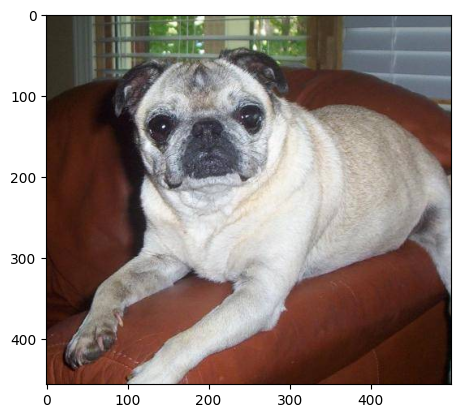

In [10]:
# display dog image
img=mpimg.imread('/content/train/dog.10779.jpg')
imgplt=plt.imshow(img)
plt.show()

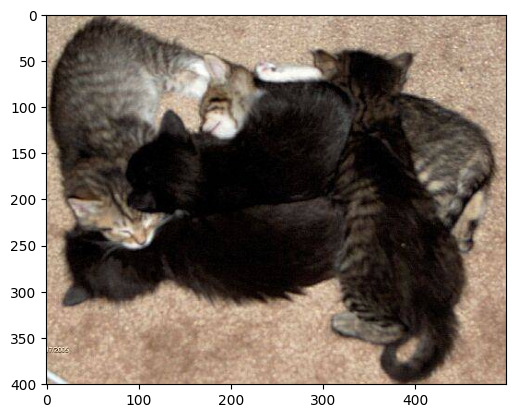

In [11]:
# display cat image
img=mpimg.imread('/content/train/cat.10779.jpg')
imgplt=plt.imshow(img)
plt.show()

We observe all the images are of different size

In [12]:
file_names=os.listdir('/content/train/')

dog_c=0
cat_c=0

for i in file_names:
  name=i[0:3]
  if name=='dog':
    dog_c+=1
  if name=='cat':
    cat_c+=1

In [13]:
print(dog_c,cat_c)

12500 12500


Dataset is equally distributed

## Resizing all the images

In [14]:
#Creating a directory for resized images
os.mkdir('/content/image_resized')

In [15]:
original_folder='/content/train/'
resized_folder='/content/image_resized/'

for i in range(5000):  #since using a pretrained model we are using smaller data to train
  filename=os.listdir(original_folder)[i]
  img_path=original_folder+filename

  img=Image.open(img_path)
  img=img.resize((224,224))   #224 is compatible for mobilnet model
  img=img.convert('RGB')

  newImgPath=resized_folder+filename
  img.save(newImgPath)

In [16]:
import os
#counting number of file in train FOlder
path, dirs, files = next(os.walk('/content/image_resized'))
file_count=len(files)
print('NUmber of images:', file_count)

NUmber of images: 5000


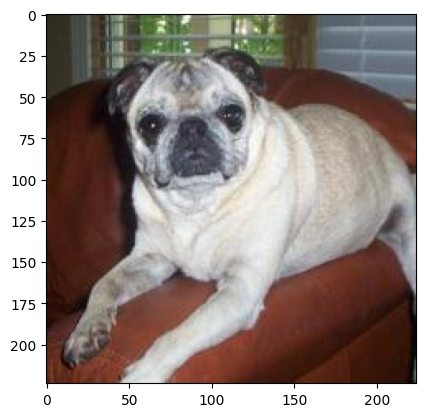

In [17]:
# display resized dog image
img=mpimg.imread('/content/image_resized/dog.10779.jpg')
imgplt=plt.imshow(img)
plt.show()

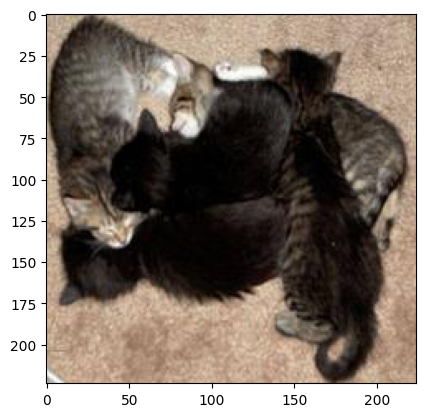

In [18]:
# display resized cat image
img=mpimg.imread('/content/image_resized/cat.10779.jpg')
imgplt=plt.imshow(img)
plt.show()

Creating labels for resized images

Cat=0
Dog=1

In [19]:
file_names=os.listdir('/content/image_resized/')

labels=[]

for i in file_names:
  name=i[0:3]
  if name=='dog':
    labels.append(1)
  if name=='cat':
    labels.append(0)

In [20]:
len(labels)

5000

In [21]:
file_names=os.listdir('/content/image_resized/')

dog_c_resized=0
cat_c_resized=0

for i in file_names:
  name=i[0:3]
  if name=='dog':
    dog_c_resized+=1
  if name=='cat':
    cat_c_resized+=1

In [31]:
(dog_c_resized,cat_c_resized)

#almost similar distribution

(2488, 2512)

Converting all the resized images to numpy arrays

In [23]:
import cv2
import glob

In [24]:
image_directory='/content/image_resized/'
img_extension=['png','jpg']
files=[]
[files.extend(glob.glob(image_directory+"*."+e)) for e in img_extension]

dog_cat_images=np.asarray([cv2.imread(file) for file in files])

In [25]:
dog_cat_images[0:5]

array([[[[ 55,  44,  47],
         [ 55,  44,  47],
         [ 55,  44,  47],
         ...,
         [ 51,  44,  47],
         [ 51,  44,  47],
         [ 51,  44,  47]],

        [[ 55,  44,  47],
         [ 55,  44,  47],
         [ 55,  44,  47],
         ...,
         [ 51,  44,  47],
         [ 51,  44,  47],
         [ 51,  44,  47]],

        [[ 55,  44,  47],
         [ 55,  44,  47],
         [ 55,  44,  47],
         ...,
         [ 51,  44,  47],
         [ 51,  44,  47],
         [ 51,  44,  47]],

        ...,

        [[128, 119, 139],
         [129, 120, 140],
         [129, 122, 143],
         ...,
         [ 48,  44,  49],
         [ 51,  45,  50],
         [ 51,  45,  50]],

        [[140, 131, 151],
         [138, 129, 149],
         [134, 127, 148],
         ...,
         [ 48,  44,  49],
         [ 51,  45,  50],
         [ 51,  45,  50]],

        [[137, 128, 148],
         [134, 125, 145],
         [130, 123, 144],
         ...,
         [ 48,  44,  49],
        

In [26]:
dog_cat_images.shape

(5000, 224, 224, 3)

In [27]:
x=dog_cat_images
y=np.asarray(labels)

Train Test Split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [29]:
print(x.shape,x_train.shape,x_test.shape)

(5000, 224, 224, 3) (4000, 224, 224, 3) (1000, 224, 224, 3)


4000--> training images
1000--> test images

In [30]:
#scaling data
x_train_scaled=x_train/255
x_test_scaled=x_test/255

Building a neural network

In [43]:
import tensorflow as tf
import tensorflow_hub as hub

In [44]:
mobilenet_model='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model=hub.KerasLayer(mobilenet_model,input_shape=(224,224,3), trainable=False)

In [48]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
    pretrained_model,
    tf.keras.layers.Dense(2)  # Output logits
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7b732450a690> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)